# Eddington Problem: A Parameter extrimation proble using Hamiltonian Monte Carlo (HMC)

## The aim of this exercise is to analyse photographic plates from Eddington's 1919 eclipse expedition, to determine whether the data favour Newtonian gravity or Einstein's General Theory of Relativity. 


In [5]:
# Importing library
import numpy as np
import matplotlib.pyplot as plt


In [6]:
# importing data
x, y, ex, ey, Dx_obs_un, Dy_obs_un = np.loadtxt("https://raw.githubusercontent.com/Priyatam-Kumar/Assignment_6-Eddington/main/eddington.dat", unpack=True, skiprows=2)

# correction to the data as observed data are uncorrected. 
Dx_cor = Dx_obs_un + 1.5
Dy_cor = Dy_obs_un + 1.324


# Defining function
def Dx_model(a, b, c, ex, x, y, alpha):
      Dx = a*x + b*y + c + alpha*ex 
      return Dx

def Dy_model(d, e, f, ey, x, y, alpha):
      Dy = d*x + e*y + f + alpha * ey
      return Dy


# Defining log of likelihood function
def Likelihood(alpha, a, b, c, d, e, f):
      L = 0
      for i in range(len(x)):
            sigma_Dx = 0.05
            sigma_Dy = 0.05
            Li_x = (-0.5*((Dx_cor[i] - Dx_model(a, b, c, ex[i], x[i], y[i], alpha))/sigma_Dx)**2)
            Li_y = (-0.5*((Dy_cor[i] - Dy_model(d, e, f, ey[i], x[i], y[i], alpha))/sigma_Dy)**2) 

            L = L+Li_x + Li_y
      return L




## Metropolish-Hashting Algorithm and plotting output values of all parameters

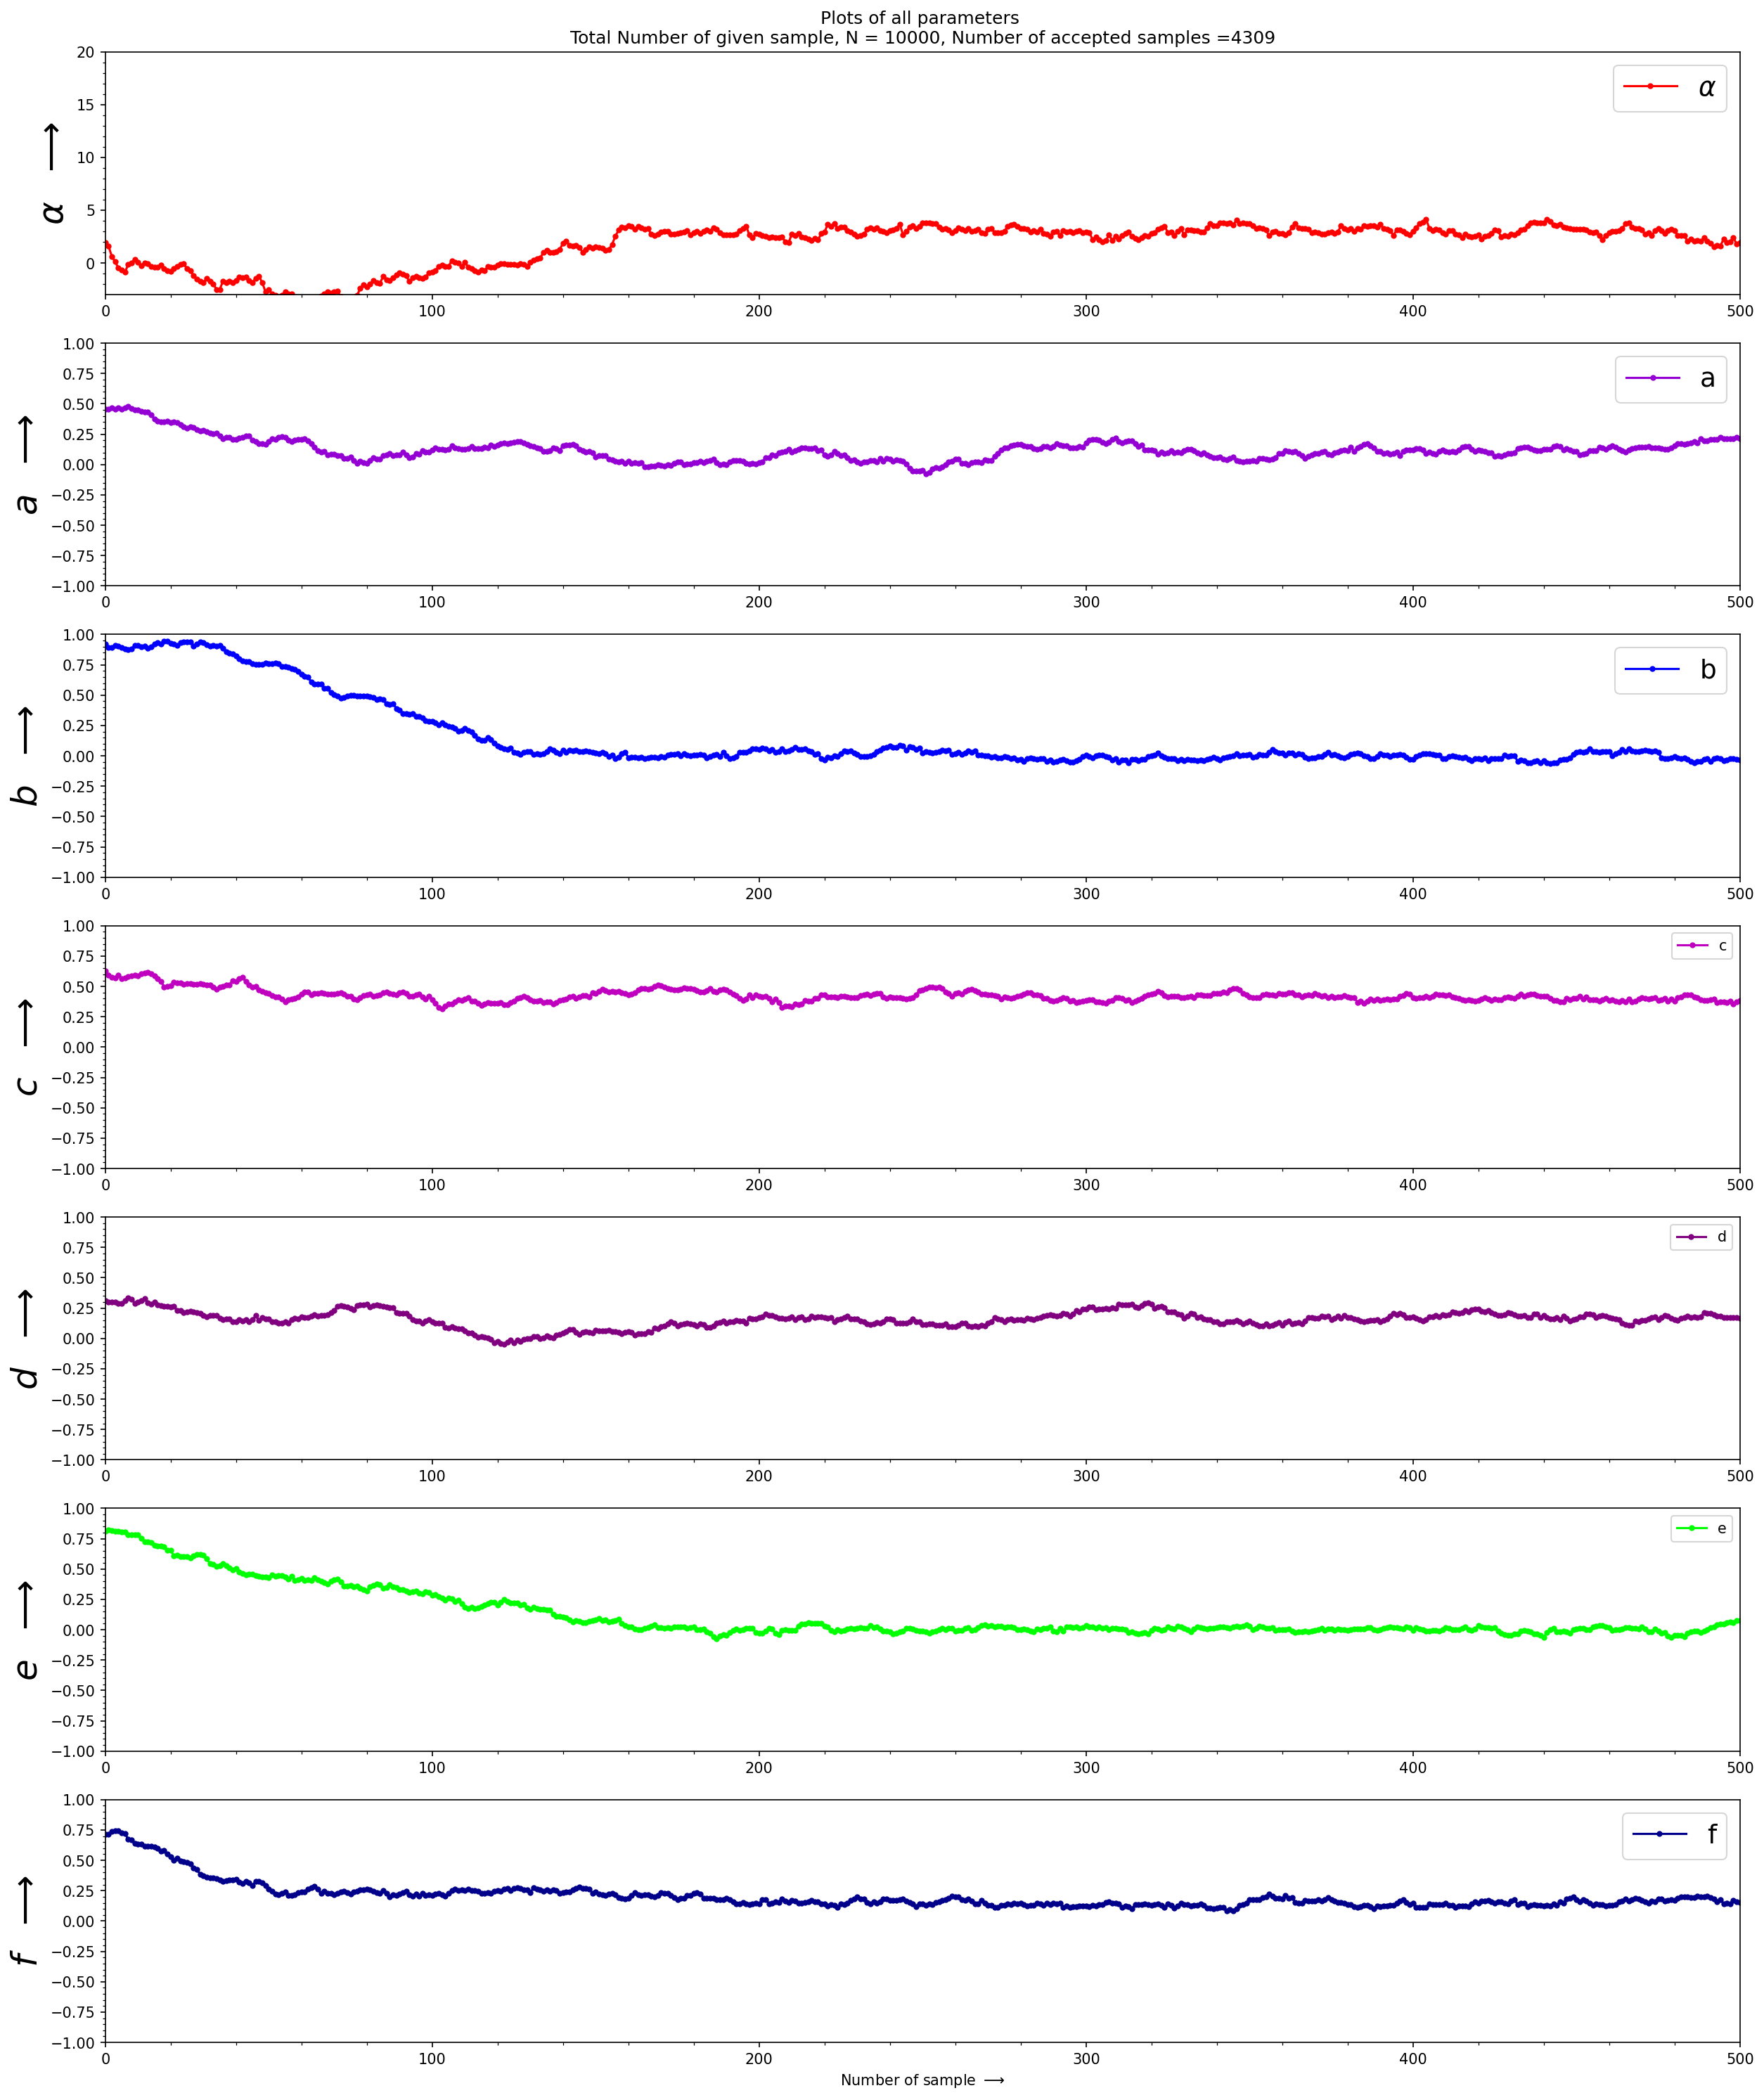

In [7]:
Num_Samples = 10000
a_accept = np.array([np.random.uniform(0, 1)])
b_accept = np.array([np.random.uniform(0, 1)])
c_accept = np.array([np.random.uniform(0, 1)])
d_accept = np.array([np.random.uniform(0, 1)])
e_accept = np.array([np.random.uniform(0, 1)])
f_accept = np.array([np.random.uniform(0, 1)])
alpha_accept = np.array([np.random.uniform(0, 1)])
prob = np.array([])

for i in range(Num_Samples):
      alpha = np.random.normal(alpha_accept[-1], 0.015)
      a = np.random.normal(a_accept[-1], 0.015)
      b = np.random.normal(b_accept[-1], 0.015)
      c = np.random.normal(c_accept[-1], 0.015)
      d = np.random.normal(d_accept[-1], 0.015)
      e = np.random.normal(e_accept[-1], 0.015)
      f = np.random.normal(f_accept[-1], 0.015)

      new_likelihood = Likelihood(alpha, a, b, c, d, e, f)
      pre_likelihood = Likelihood(alpha_accept[-1], a_accept[-1], b_accept[-1], c_accept[-1], d_accept[-1], e_accept[-1], f_accept[-1])
      
      prob_accept = min(1, np.exp(new_likelihood - pre_likelihood))
      u = np.random.uniform(0, 1)
      if u < prob_accept:
            alpha_accept = np.append(alpha_accept, alpha)
            a_accept = np.append(a_accept, a)
            b_accept = np.append(b_accept, b)
            c_accept = np.append(c_accept, c)
            d_accept = np.append(d_accept, d)
            e_accept = np.append(e_accept, e)
            f_accept = np.append(f_accept, f)
            prob = np.append(prob, prob_accept)


n_burn = int(Num_Samples/10)


""" Plotting for all parameters values"""

"""Ploting value of alpha vs number of accepted samples"""
# (alpha) -------------------------------------------------

fig, (ax0, ax1, ax2, ax3, ax4, ax5, ax6) = plt.subplots(7,1,figsize=(20,25), dpi = 150)
ax0.set_title(f"""Plots of all parameters 
 Total Number of given sample, N = {Num_Samples}, Number of accepted samples ={len(alpha_accept)} """)
#plt.scatter(range(len(alpha_accept)), 19.8*alpha_accept, s = 5)
ax0.plot(range(len(alpha_accept[:])), 19.8*alpha_accept[:], 'r',marker = '.', label = r'$\alpha$')
ax0.legend(fontsize = 18)
ax0.set_xlim(0, 500)
ax0.set_ylim(-3, 20)
ax0.set_ylabel(r"$\alpha~~ \longrightarrow$", fontsize = 24)
ax0.minorticks_on()

# (a) --------------------------------------------------------
"""Ploting value of a vs number of accepted samples"""


#ax1.scatter(range(len(alpha_accept)), 19.8*alpha_accept, s = 5)
ax1.plot(range(len(a_accept[:])), a_accept[:], 'DarkViolet',marker = '.', label ='a' )
ax1.legend(fontsize = 18)
ax1.set_xlim(0, 500)
ax1.set_ylim(-1, 1)
ax1.set_ylabel(r"$a~~ \longrightarrow$", fontsize = 24)
ax1.minorticks_on()

# (b) ---------------------------------------------------------
plt.subplot(7,1,3)

#plt.scatter(range(len(alpha_accept)), alpha_accept, s = 5)
ax2.plot(range(len(b_accept[:])), b_accept[:], 'b',marker = '.', label = 'b')
ax2.legend(fontsize = 18)
ax2.set_xlim(0, 500)
ax2.set_ylim(-1, 1)
ax2.set_ylabel(r"$b~~ \longrightarrow$", fontsize = 24)
ax2.minorticks_on()


# (c) -----------------------------------------------------------


#plt.scatter(range(len(alpha_accept)), alpha_accept, s = 5)
ax3.plot(range(len(c_accept[:])), c_accept[:], 'm',marker = '.', label = 'c')
ax3.legend()
ax3.set_xlim(0, 500)
ax3.set_ylim(-1, 1)
ax3.set_ylabel(r"$c~~ \longrightarrow$", fontsize = 24)
ax3.minorticks_on()

# (d) ---------------------------------------------------------


#plt.scatter(range(len(alpha_accept)), alpha_accept, s = 5)
ax4.plot(range(len(d_accept[:])), d_accept[:], 'purple',marker = '.', label = 'd')
ax4.legend()
ax4.set_xlim(0, 500)
ax4.set_ylim(-1, 1)
ax4.set_ylabel(r"$d~~ \longrightarrow$", fontsize = 24)
ax4.minorticks_on()

# (e) -------------------------------------------------------------

#plt.scatter(range(len(alpha_accept)), alpha_accept, s = 5)
ax5.plot(range(len(e_accept[:])), e_accept[:], 'lime',marker = '.', label = 'e')
ax5.legend()
ax5.set_xlim(0, 500)
ax5.set_ylim(-1, 1)
ax5.set_ylabel(r"$e~~ \longrightarrow$", fontsize = 24)
ax5.minorticks_on()

# (f) ----------------------------------------------------------------

#plt.scatter(range(len(alpha_accept)), alpha_accept, s = 5)
ax6.plot(range(len(f_accept[:])), f_accept[:], 'darkblue',marker = '.', label = 'f')
ax6.legend(fontsize = 18)
ax6.set_xlim(0, 500)
ax6.set_ylim(-1, 1)
ax6.set_xlabel("Number of sample $\longrightarrow$")
ax6.set_ylabel(r"$f~~ \longrightarrow$", fontsize = 24)
ax6.minorticks_on()


plt.show()

# Mean values of $\alpha$ obtained from the MCMC with standard deviation

Obtain value of Alpha from MCMC code
Mean Value of Alpha = 2.9588142522495833
Standard deviation of Alpha = 1.0928245619745416


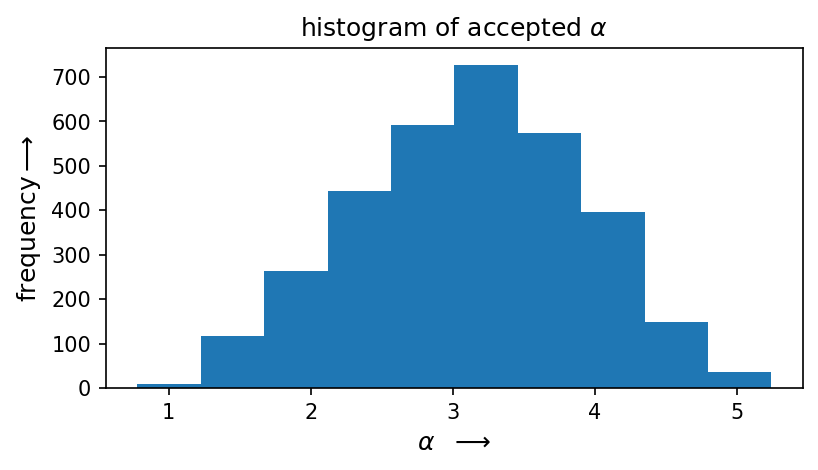

In [8]:
# Calculating the mean and std of alpha
alpha_mean = np.mean(19.8*alpha_accept)
alpha_std = np.std(19.8*alpha_accept)

print("Obtain value of Alpha from MCMC code")
print(f"Mean Value of Alpha = {alpha_mean}")
print(f"Standard deviation of Alpha = {alpha_std}")

# plotting the samples of alpha
plt.figure(figsize = [6,3], dpi =150)
plt.hist(19.8*alpha_accept[n_burn:])
plt.xlabel(r"$\alpha ~~\longrightarrow$", fontsize = 12)
plt.ylabel(r"frequency$\longrightarrow$", fontsize = 12)
plt.title(r"histogram of accepted $\alpha$")
plt.show()

# Multiple chain

Running multiples chain

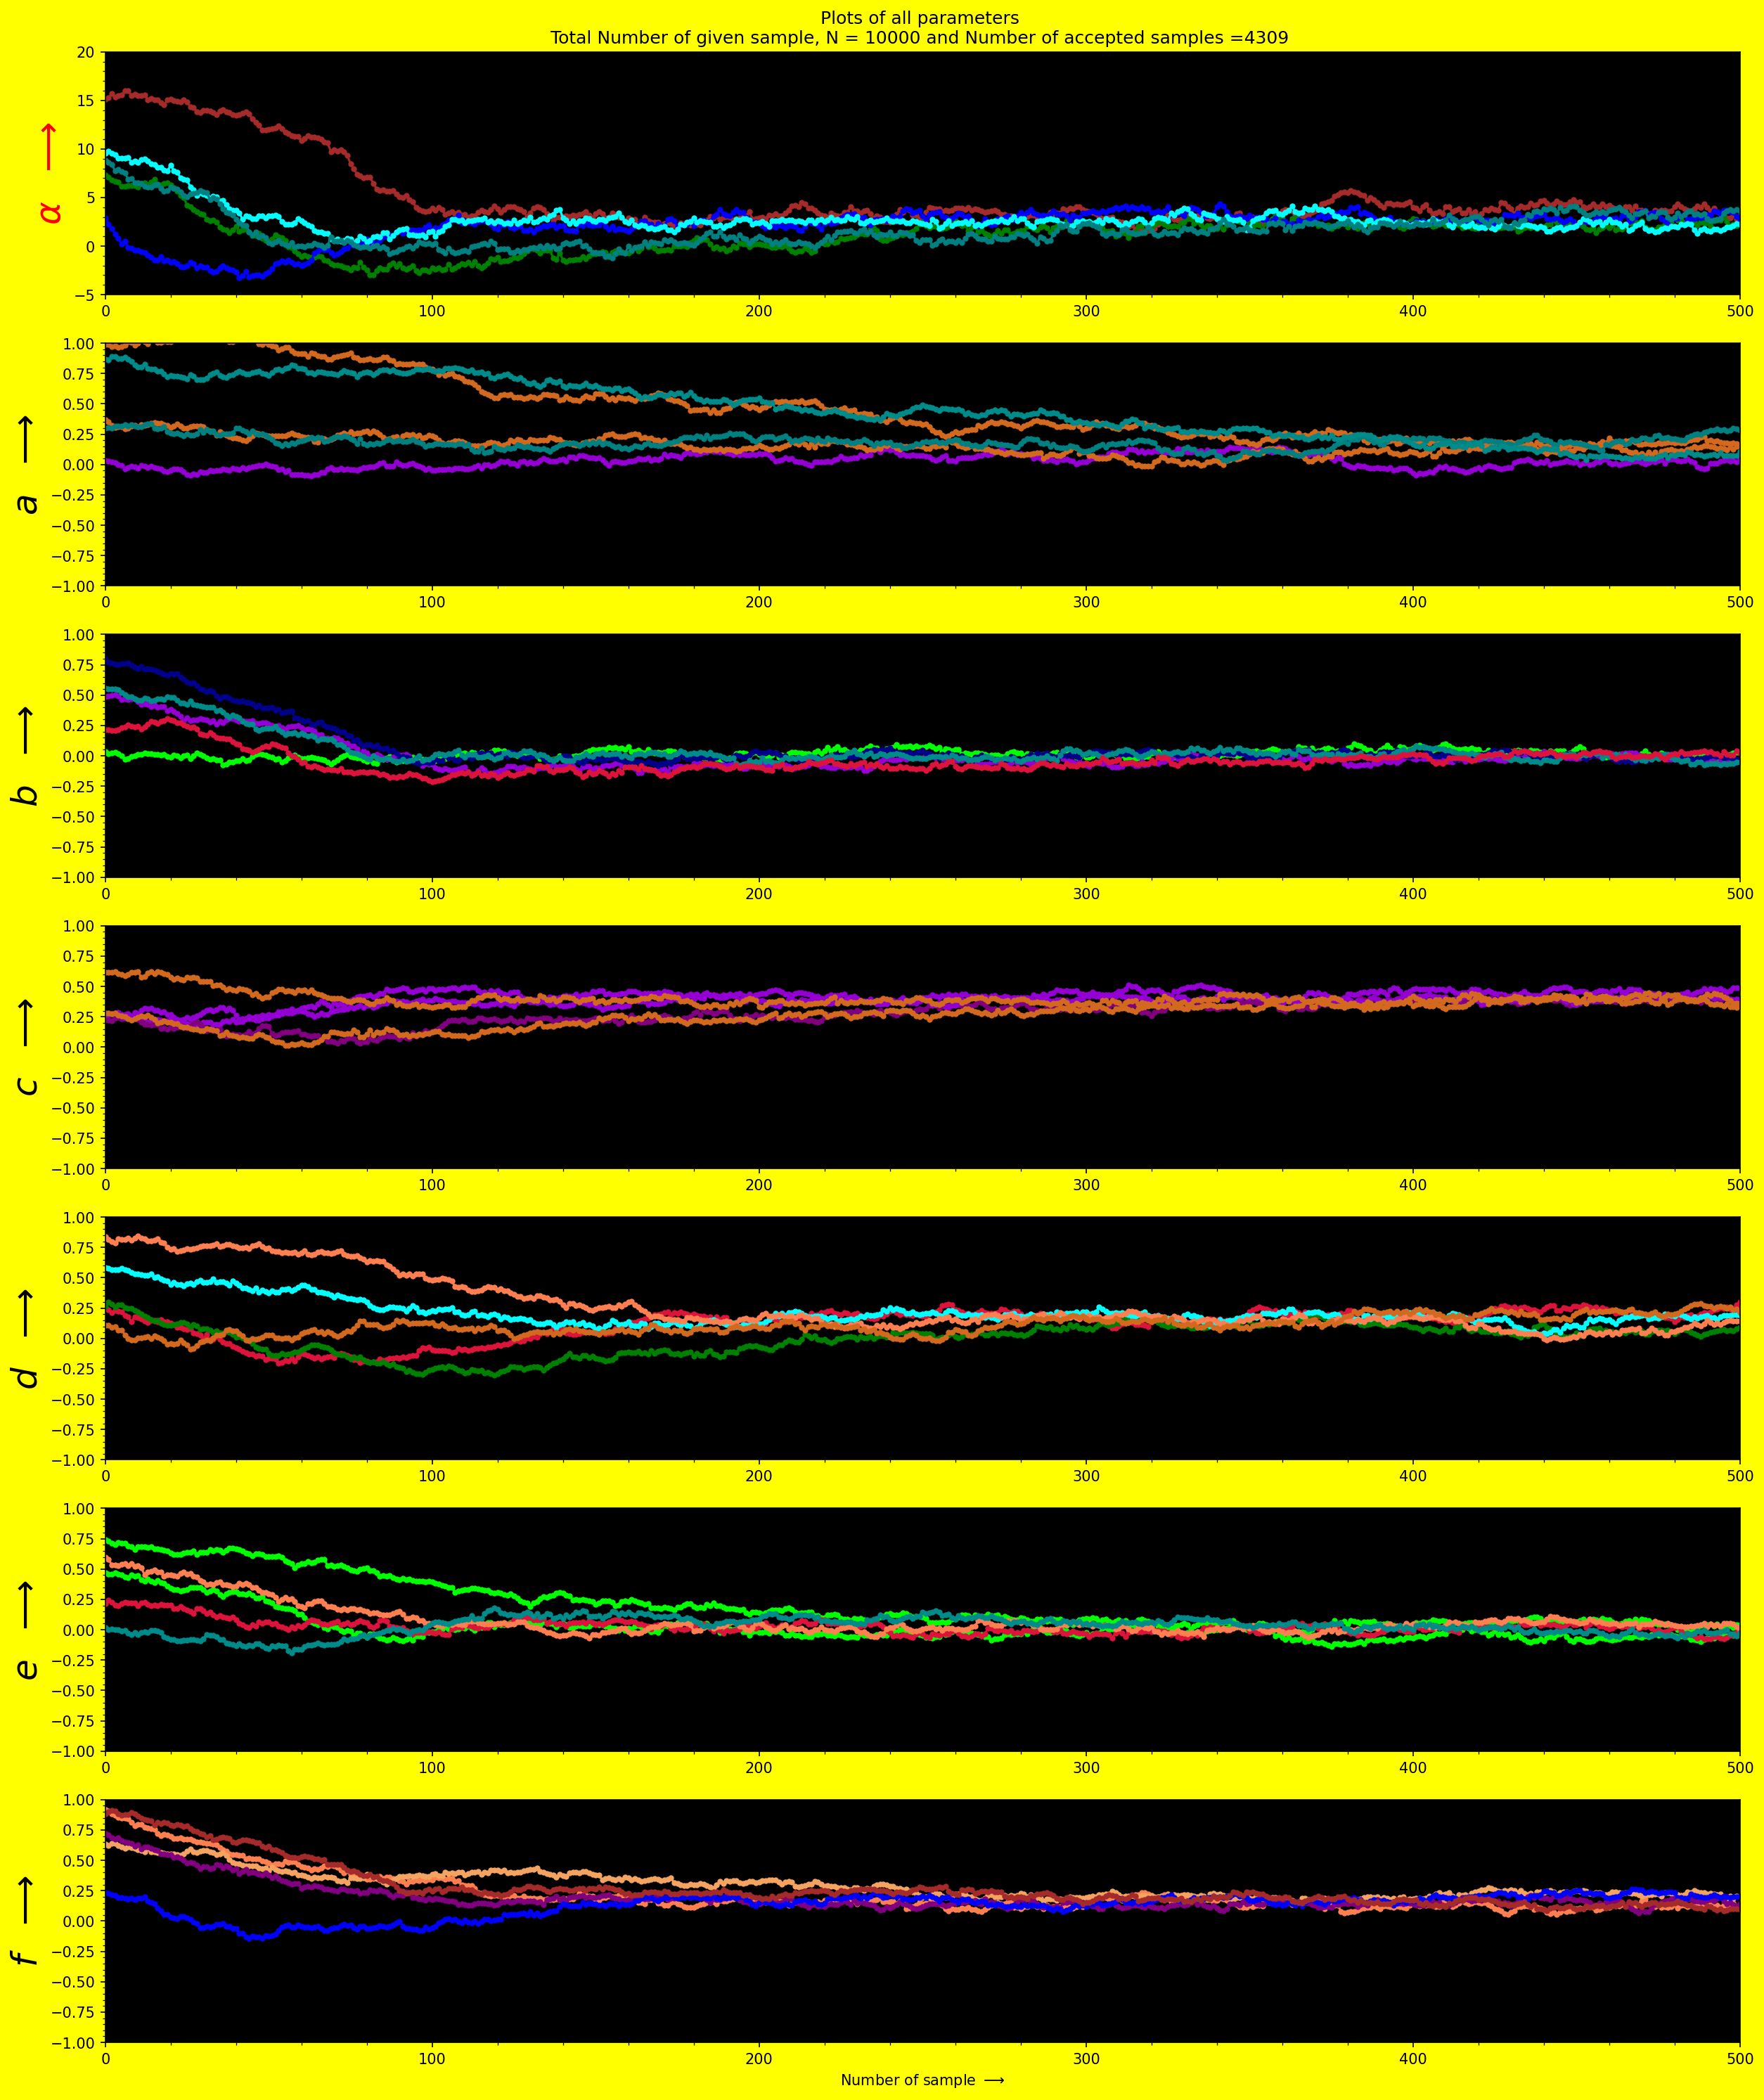

In [9]:
Num_Samples = 10000
line_color = ['red', 'blue', 'purple', 'green', 'DarkViolet', 'lime','darkblue', 'brown', 'aqua', 'chocolate', 'coral', 'crimson', 'darkgoldenrod', 'darkcyan', 'teal', 'sandybrown']

fig, (ax0, ax1, ax2, ax3, ax4, ax5, ax6) = plt.subplots(7,1,figsize=(20,25), dpi = 150, facecolor = 'yellow')
ax0.set_title(f"""Plots of all parameters 
Total Number of given sample, N = {Num_Samples} and Number of accepted samples ={len(alpha_accept)} """)

# Number of chain
num_chain = 5

for j in range(0, num_chain):
      a_accept = np.array([np.random.uniform(0, 1)])
      b_accept = np.array([np.random.uniform(0, 1)])
      c_accept = np.array([np.random.uniform(0, 1)])
      d_accept = np.array([np.random.uniform(0, 1)])
      e_accept = np.array([np.random.uniform(0, 1)])
      f_accept = np.array([np.random.uniform(0, 1)])
      alpha_accept = np.array([np.random.uniform(0, 1)])
      prob = np.array([])

      for i in range(Num_Samples):
            alpha = np.random.normal(alpha_accept[-1], 0.015)
            a = np.random.normal(a_accept[-1], 0.015)
            b = np.random.normal(b_accept[-1], 0.015)
            c = np.random.normal(c_accept[-1], 0.015)
            d = np.random.normal(d_accept[-1], 0.015)
            e = np.random.normal(e_accept[-1], 0.015)
            f = np.random.normal(f_accept[-1], 0.015)

            new_likelihood = Likelihood(alpha, a, b, c, d, e, f)
            pre_likelihood = Likelihood(alpha_accept[-1], a_accept[-1], b_accept[-1], c_accept[-1], d_accept[-1], e_accept[-1], f_accept[-1])
            
            prob_accept = min(1, np.exp(new_likelihood - pre_likelihood))
            u = np.random.uniform(0, 1)
            if u < prob_accept:
                  alpha_accept = np.append(alpha_accept, alpha)
                  a_accept = np.append(a_accept, a)
                  b_accept = np.append(b_accept, b)
                  c_accept = np.append(c_accept, c)
                  d_accept = np.append(d_accept, d)
                  e_accept = np.append(e_accept, e)
                  f_accept = np.append(f_accept, f)
                  prob = np.append(prob, prob_accept)


      n_burn = int(Num_Samples/10)


      """ Plotting for all parameters values"""

      """Ploting value of alpha vs number of accepted samples"""
      # (alpha) -------------------------------------------------

      
      #plt.scatter(range(len(alpha_accept)), 19.8*alpha_accept, s = 5)
      #ax0.plot(range(len(alpha_accept[:])), 19.8*alpha_accept[:], 'r',marker = '.', label = r'$\alpha$')
      ax0.plot(range(len(alpha_accept[:])), 19.8*alpha_accept[:],color = line_color[np.random.randint(0, len(line_color))], marker ='.')
      ax0.set_xlim(0, 500)
      ax0.set_ylim(-5, 20)
      ax0.set_ylabel(r"$\alpha~~ \longrightarrow$", fontsize = 24, color = 'red')
      ax0.minorticks_on()
      ax0.set_facecolor('black')

      # (a) --------------------------------------------------------
      """Ploting value of a vs number of accepted samples"""


      #ax1.scatter(range(len(alpha_accept)), 19.8*alpha_accept, s = 5)
      ax1.plot(range(len(a_accept[:])), a_accept[:], color = line_color[np.random.randint(0, len(line_color))],marker = '.' )
      ax1.set_xlim(0, 500)
      ax1.set_ylim(-1, 1)
      ax1.set_ylabel(r"$a~~ \longrightarrow$", fontsize = 24)
      ax1.minorticks_on()
      ax1.set_facecolor('black')

      # (b) ---------------------------------------------------------
      plt.subplot(7,1,3)

      #plt.scatter(range(len(alpha_accept)), alpha_accept, s = 5)
      ax2.plot(range(len(b_accept[:])), b_accept[:], color = line_color[np.random.randint(0, len(line_color))],marker = '.',)
      ax2.set_xlim(0, 500)
      ax2.set_ylim(-1, 1)
      ax2.set_ylabel(r"$b~~ \longrightarrow$", fontsize = 24)
      ax2.minorticks_on()
      ax2.set_facecolor('black')
      


      # (c) -----------------------------------------------------------


      #plt.scatter(range(len(alpha_accept)), alpha_accept, s = 5)
      ax3.plot(range(len(c_accept[:])), c_accept[:], color = line_color[np.random.randint(0, len(line_color))],marker = '.')
      ax3.set_xlim(0, 500)
      ax3.set_ylim(-1, 1)
      ax3.set_ylabel(r"$c~~ \longrightarrow$", fontsize = 24)
      ax3.minorticks_on()
      ax3.set_facecolor('black')

      # (d) ---------------------------------------------------------


      #plt.scatter(range(len(alpha_accept)), alpha_accept, s = 5)
      ax4.plot(range(len(d_accept[:])), d_accept[:], color = line_color[np.random.randint(0, len(line_color))],marker = '.')
      ax4.set_xlim(0, 500)
      ax4.set_ylim(-1, 1)
      ax4.set_ylabel(r"$d~~ \longrightarrow$", fontsize = 24)
      ax4.minorticks_on()
      ax4.set_facecolor('black')

      # (e) -------------------------------------------------------------

      #plt.scatter(range(len(alpha_accept)), alpha_accept, s = 5)
      ax5.plot(range(len(e_accept[:])), e_accept[:], color = line_color[np.random.randint(0, len(line_color))],marker = '.')
      ax5.set_xlim(0, 500)
      ax5.set_ylim(-1, 1)
      ax5.set_ylabel(r"$e~~ \longrightarrow$", fontsize = 24)
      ax5.minorticks_on()
      ax5.set_facecolor('black')

      # (f) ----------------------------------------------------------------

      #plt.scatter(range(len(alpha_accept)), alpha_accept, s = 5)
      ax6.plot(range(len(f_accept[:])), f_accept[:], color = line_color[np.random.randint(0, len(line_color))],marker = '.')
      
      ax6.set_xlim(0, 500)
      ax6.set_ylim(-1, 1)
      ax6.set_xlabel("Number of sample $\longrightarrow$")
      ax6.set_ylabel(r"$f~~ \longrightarrow$", fontsize = 24)
      ax6.minorticks_on()
      ax6.set_facecolor('black')


plt.show()